<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/3July2024_DecisionSurfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate a 2D dataset with non-linear patterns
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


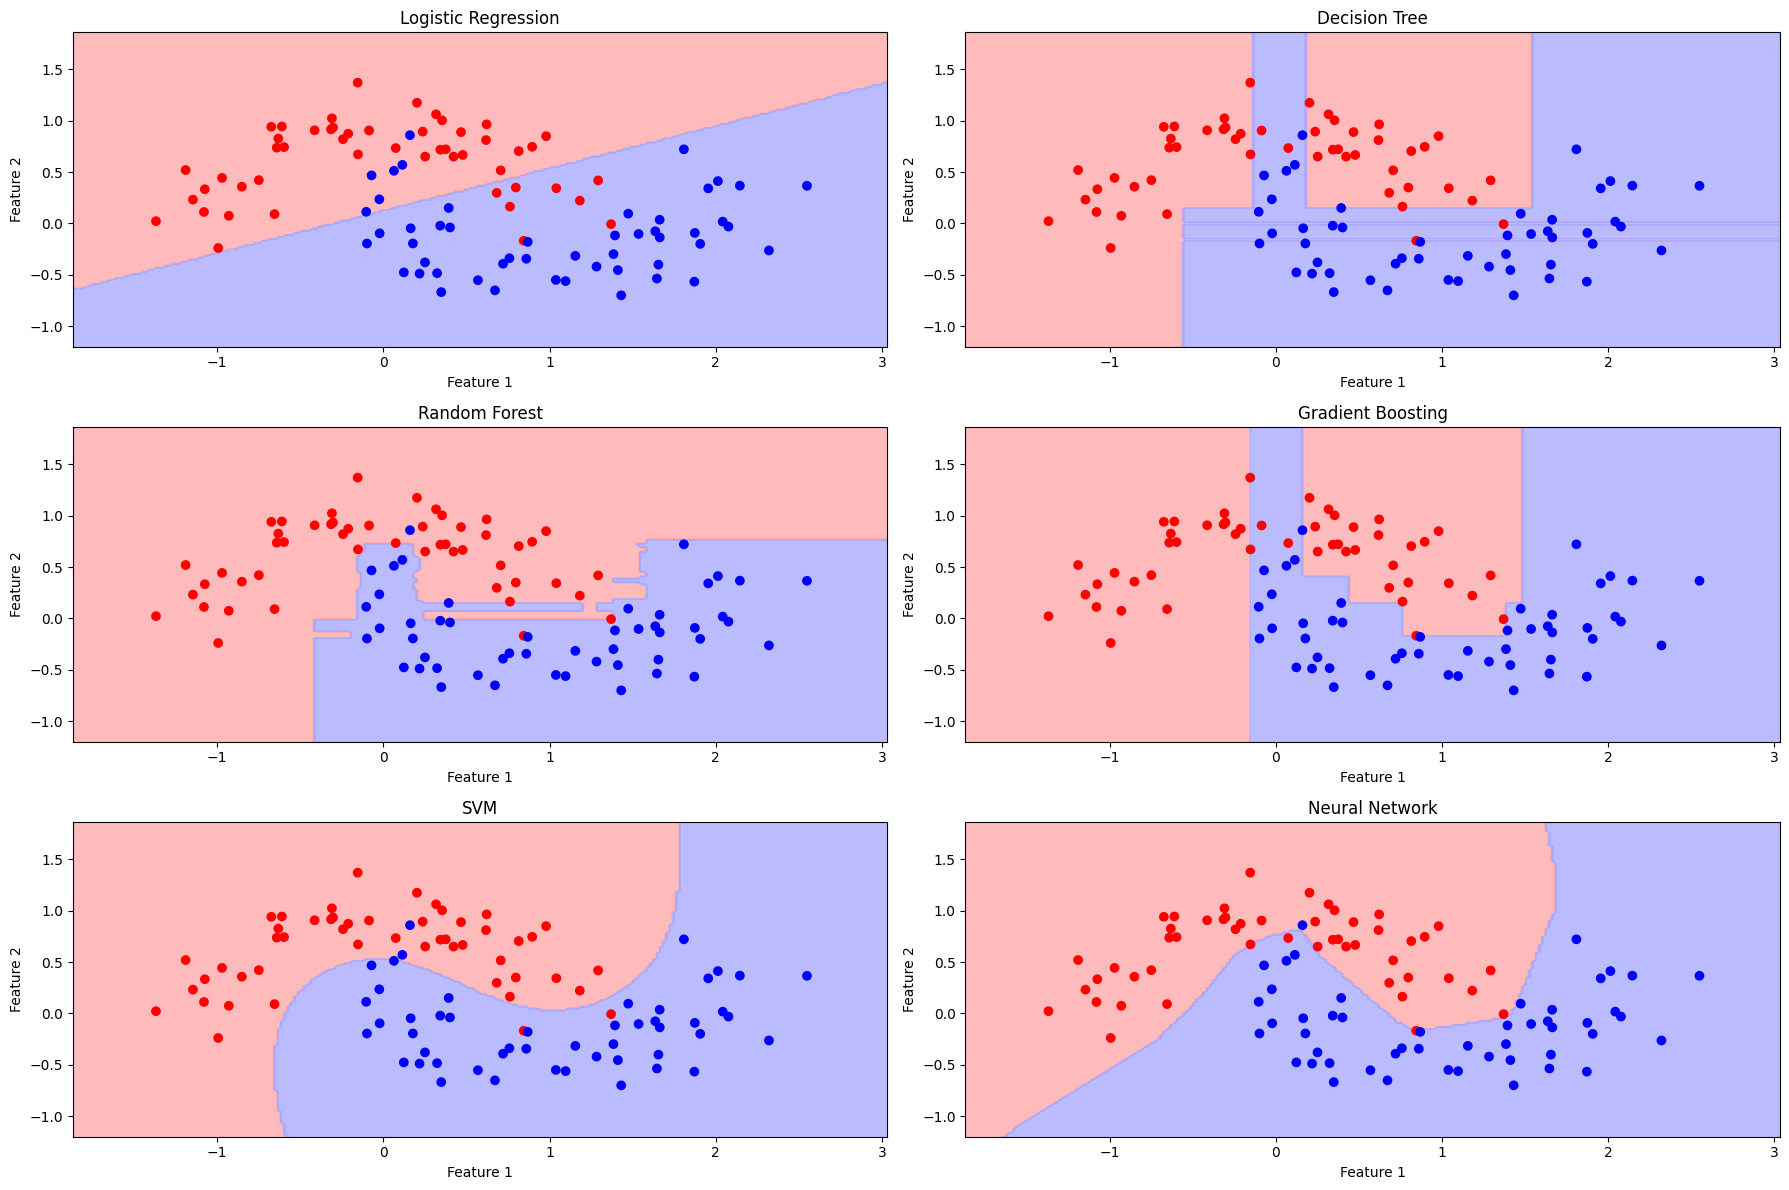

In [2]:



# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=10000)
}

# Fit models
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

# Plot decision boundaries
plt.figure(figsize=(18, 12))
i = 1
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for name, clf in classifiers.items():
    plt.subplot(3, 2, i)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(name)
    i += 1

plt.tight_layout()
plt.show()
